# Visualisation

## Check up

In [14]:
import pandas as pd

# 1. Chargement du fichier propre
df = pd.read_parquet("../data/processed/NIGERIA_FINAL_FULL.parquet")

# 2. Affichage simple de la liste
print("📋 LISTE DES COLONNES :")
print(df.columns.tolist())

# 3. Affichage avec les types (pour vérifier que 'date' est bien datetime et 'Rainfall' float)
print("\nℹ️ DÉTAILS TECHNIQUES :")
df.info()

# 4. Aperçu visuel
print("\n👀 APERÇU :")
display(df.head(3))

📋 LISTE DES COLONNES :
['admin2', 'date', 'Evap_tavg', 'LWdown_f_tavg', 'Lwnet_tavg', 'Psurf_f_tavg', 'Qair_f_tavg', 'Qg_tavg', 'Qh_tavg', 'Qle_tavg', 'Qs_tavg', 'Qsb_tavg', 'RadT_tavg', 'Rainf_f_tavg', 'SWE_inst', 'SWdown_f_tavg', 'SnowCover_inst', 'SnowDepth_inst', 'Snowf_tavg', 'Swnet_tavg', 'Tair_f_tavg', 'Wind_f_tavg', 'SoilMoi00_10cm_tavg', 'SoilMoi10_40cm_tavg', 'SoilMoi40_100cm_tavg', 'SoilMoi100_200cm_tavg', 'SoilTemp00_10cm_tavg', 'SoilTemp10_40cm_tavg', 'SoilTemp40_100cm_tavg', 'SoilTemp100_200cm_tavg', 'phase1', 'phase2', 'phase3', 'phase4', 'phase5', 'population', 'phase35']

ℹ️ DÉTAILS TECHNIQUES :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43440 entries, 0 to 43439
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   admin2                  43440 non-null  object        
 1   date                    43440 non-null  datetime64[ns]
 2   Evap_tavg               43

,admin2,date,Evap_tavg,LWdown_f_tavg,Lwnet_tavg,Psurf_f_tavg,Qair_f_tavg,Qg_tavg,Qh_tavg,Qle_tavg,...,SoilTemp10_40cm_tavg,SoilTemp40_100cm_tavg,SoilTemp100_200cm_tavg,phase1,phase2,phase3,phase4,phase5,population,phase35
0,AbaSouth,2020-01-01,0.000029,383.5031,-70.028404,100462.58,0.012456,1.073294,37.359870,73.344410,...,299.40295,299.13416,298.86070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AbaSouth,2020-02-01,0.000009,397.5511,-73.352710,100404.08,0.014947,3.735431,60.410984,22.267885,...,301.30142,300.37408,299.49460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AbaSouth,2020-03-01,0.000029,415.2984,-45.273190,100361.08,0.018468,-0.786765,9.271555,72.505660,...,300.89066,300.84122,300.38528,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 1. Chargement
df = pd.read_parquet("../data/processed/NIGERIA_FINAL_FULL.parquet")

# 2. Création de la target en Pourcentage
# On utilise 'phase35' (Crise + Urgence + Famine) et 'population'
# Pandas gère les NaN automatiquement : si phase35 est vide, le résultat sera NaN (c'est ce qu'on veut)
df['target_pct'] = (df['phase35'] / df['population']) * 100

print("Variable 'target_pct' créée.")
display(df[['admin2', 'date', 'Rainf_f_tavg', 'target_pct']].head())

Variable 'target_pct' créée.


,admin2,date,Rainf_f_tavg,target_pct
0,AbaSouth,2020-01-01,0.000007,NaN
1,AbaSouth,2020-02-01,0.000006,NaN
2,AbaSouth,2020-03-01,0.000056,NaN
3,AbaSouth,2020-04-01,0.000060,NaN
4,AbaSouth,2020-05-01,0.000086,NaN


## Charte graphique

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Chargement
df = pd.read_parquet("../data/processed/NIGERIA_FINAL_FULL.parquet")

# (Rappel conversion si besoin)
if df['Rainf_f_tavg'].mean() < 1:
    df['Rainfall_mm'] = df['Rainf_f_tavg'] * 86400 * 30.4
else:
    df['Rainfall_mm'] = df['Rainf_f_tavg']

df['target_pct'] = (df['phase35'] / df['population']) * 100

# 2. CONFIGURATION ESTHÉTIQUE
sns.set_style("white") # Fond blanc épuré (pas de grille grise moche)
sns.set_context("notebook", font_scale=1.1) # Texte plus lisible

# Palettes de couleurs personnalisées
# Rouge pour le danger (Famine), Bleu pour la pluie, Vert pour la végétation
red_grad = sns.color_palette("Reds_r", 15) 
blue_grad = sns.color_palette("Blues", 15)

## Visualisation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Chargement & Prépa
df = pd.read_parquet("../data/processed/NIGERIA_FINAL_FULL.parquet")

# Conversion Pluie (si pas déjà fait)
if df['Rainf_f_tavg'].mean() < 1:
    df['Rainfall_mm'] = df['Rainf_f_tavg'] * 86400 * 30.4
else:
    df['Rainfall_mm'] = df['Rainf_f_tavg']

# Target %
df['target_pct'] = (df['phase35'] / df['population']) * 100


Génération du graphique interactif (Zoomable)...


Generation du graphique interactif...



Generation du Top 15 des regions...


C:\Users\valen\AppData\Local\Temp\ipykernel_12056\2647624530.py:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




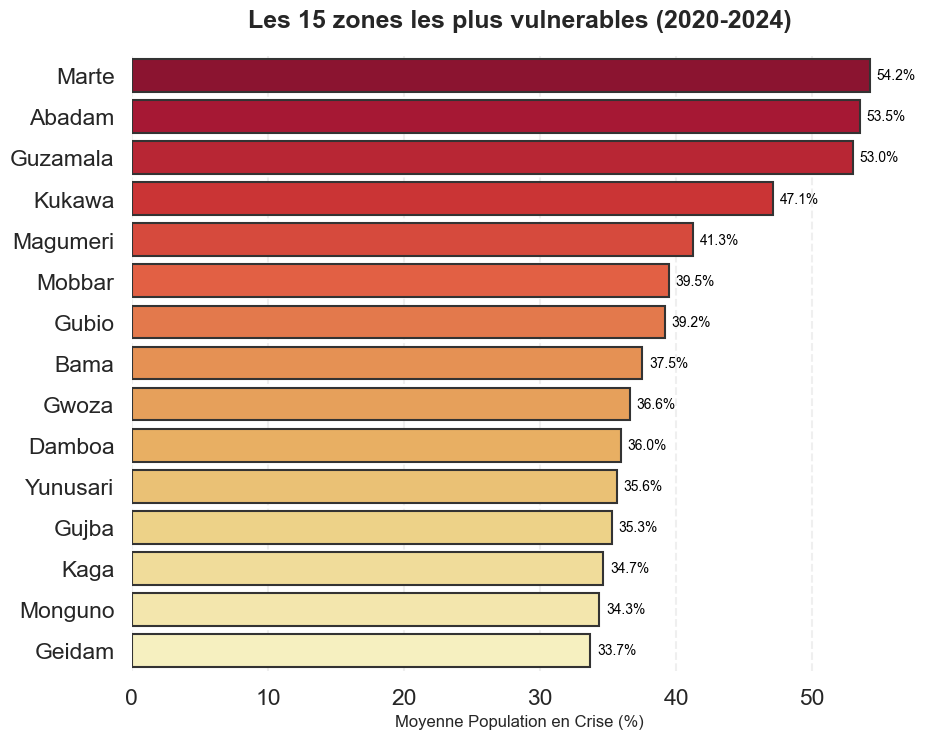


Generation de la Heatmap Saisonniere...


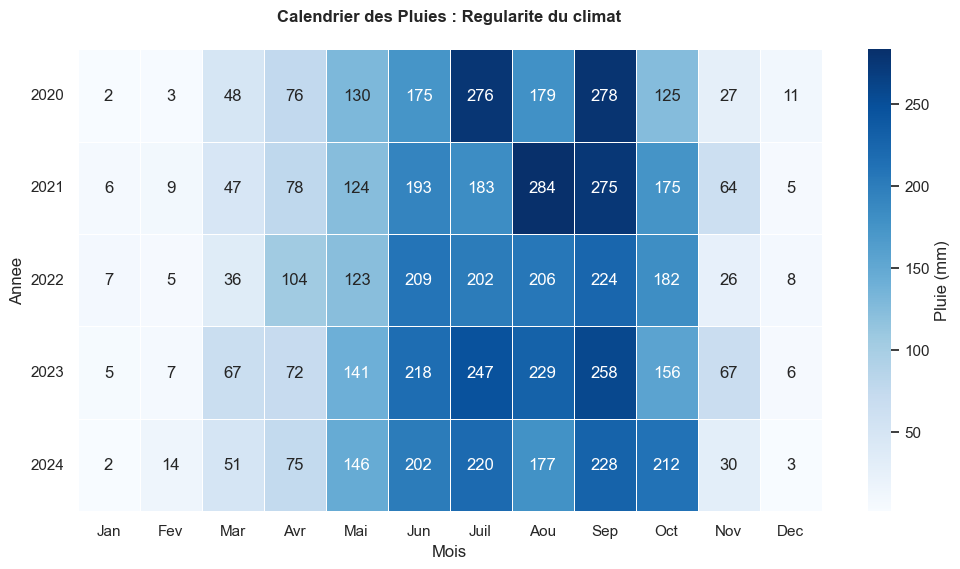

In [25]:



# ==============================================================================
# 1. GRAPHIQUE INTERACTIF (Plotly) - Chronologie
# ==============================================================================
print("Generation du graphique interactif...")

# Agrégation nationale par date
national = df.groupby('date')[['Rainfall_mm', 'target_pct']].mean().reset_index()

# Création du graphique à double axe
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Trace 1 : La Pluie (Zone remplie)
fig.add_trace(
    go.Scatter(
        x=national['date'], 
        y=national['Rainfall_mm'], 
        name="Precipitations",
        fill='tozeroy', 
        line=dict(color='rgba(0, 100, 250, 0.5)', width=1)
    ),
    secondary_y=False,
)

# Trace 2 : L'Insécurité Alimentaire (Ligne Rouge)
fig.add_trace(
    go.Scatter(
        x=national['date'], 
        y=national['target_pct'], 
        name="Insecurite Alim. (Phase 3+)",
        mode='lines+markers',
        connectgaps=True,         # Relie les points malgré les données manquantes
        line=dict(color='#d62728', width=3),
        marker=dict(size=8, symbol='circle')
    ),
    secondary_y=True,
)

# Mise en page épurée
fig.update_layout(
    title_text="<b>Chronologie Climatique et Alimentaire</b><br><span style='font-size:12px;color:grey'>Survolez pour voir les valeurs exactes</span>",
    template="plotly_white",
    hovermode='x unified',
    legend=dict(orientation="h", y=1.1, x=0.5, xanchor="center"),
    height=600
)

# Configuration des axes
fig.update_yaxes(title_text="Pluie (mm/mois)", secondary_y=False, showgrid=False)
fig.update_yaxes(title_text="Population en Crise (%)", secondary_y=True, showgrid=True, gridcolor='lightgrey')

fig.show()


# ==============================================================================
# 2. TOP 15 REGIONS (Seaborn) - Classement
# ==============================================================================
print("\nGeneration du Top 15 des regions...")

# Calcul de la moyenne par région et tri
top15 = df.groupby('admin2')['target_pct'].mean().sort_values(ascending=False).head(15).reset_index()

plt.figure(figsize=(10, 8))
sns.set_theme(style="white", context="talk")

# Palette de couleurs : Jaune vers Rouge foncé
colors = sns.color_palette("YlOrRd_r", n_colors=15)

ax = sns.barplot(x="target_pct", y="admin2", data=top15, palette=colors, edgecolor=".2")

# Nettoyage du cadre (Despine)
sns.despine(left=True, bottom=True)
ax.xaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_xlabel("Moyenne Population en Crise (%)", fontsize=12)
ax.set_ylabel("")
ax.set_title("Les 15 zones les plus vulnerables (2020-2024)", fontweight='bold', pad=20)

# Affichage des valeurs numériques
for i, v in enumerate(top15["target_pct"]):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=10, color='black')

plt.show()


# ==============================================================================
# 3. SAISONNALITE (Heatmap) - Calendrier
# ==============================================================================
print("\nGeneration de la Heatmap Saisonniere...")

# Préparation de la table pivot (Année x Mois) pour la pluie
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
pivot_rain = df.groupby(['year', 'month'])['Rainfall_mm'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.set_theme(style="white")

# Création de la heatmap
ax = sns.heatmap(pivot_rain, cmap="Blues", annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Pluie (mm)'})

plt.title("Calendrier des Pluies : Regularite du climat", fontweight='bold', pad=20)
plt.xlabel("Mois")
plt.ylabel("Annee")
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jun', 'Juil', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=0)

plt.show()


 Génération du Top 15...


C:\Users\valen\AppData\Local\Temp\ipykernel_12056\3615185886.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




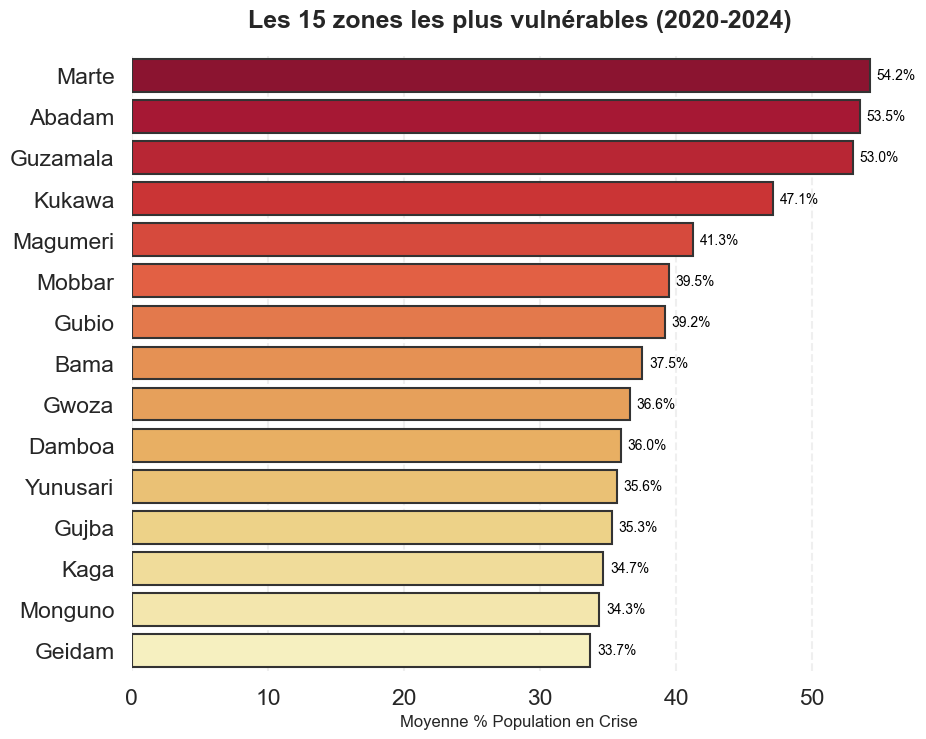

In [23]:

# ==============================================================================
# 2. TOP 15 RÉGIONS (Style "Seaborn Minimalist")
# ==============================================================================
print("\n Génération du Top 15...")

# Préparation
top15 = df.groupby('admin2')['target_pct'].mean().sort_values(ascending=False).head(15).reset_index()

plt.figure(figsize=(10, 8))
sns.set_theme(style="white", context="talk") # Thème "Talk" = Police plus grosse pour présentation

# Palette de couleurs : Du jaune (danger moyen) au rouge sang (danger critique)
colors = sns.color_palette("YlOrRd_r", n_colors=15)

ax = sns.barplot(x="target_pct", y="admin2", data=top15, palette=colors, edgecolor=".2")

# Nettoyage visuel (Le style "Data Ink Ratio")
sns.despine(left=True, bottom=True)
ax.xaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_xlabel("Moyenne % Population en Crise", fontsize=12)
ax.set_ylabel("")
ax.set_title("Les 15 zones les plus vulnérables (2020-2024)", fontweight='bold', pad=20)

# Ajout des valeurs au bout des barres
for i, v in enumerate(top15["target_pct"]):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=10, color='black')

plt.show()




Génération de la Heatmap Saisonnier...


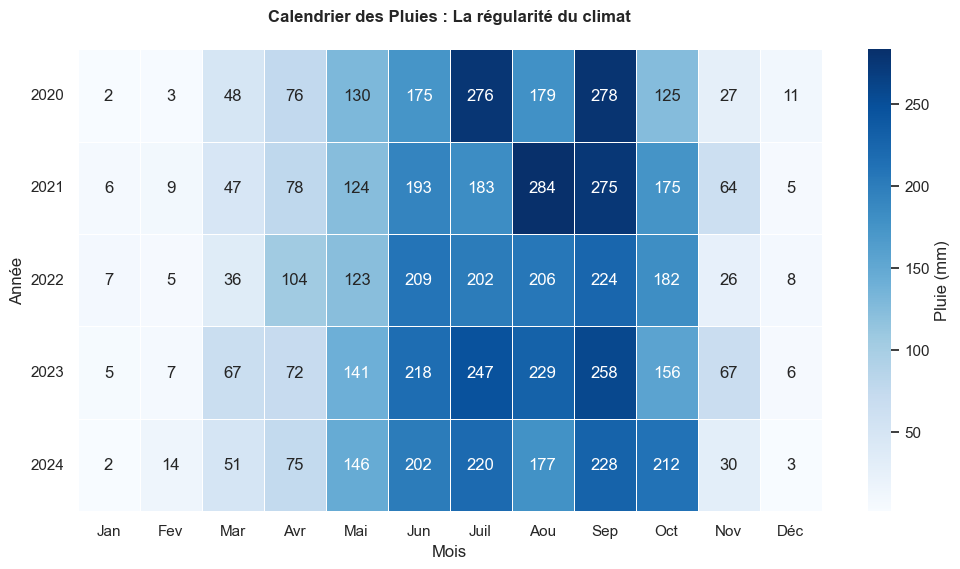

In [24]:

# ==============================================================================
# 3. SAISONNALITÉ (Heatmap Circulaire ou Classique Propre)
# ==============================================================================
print("\nGénération de la Heatmap Saisonnier...")

# Pivot table : Mois x Année pour la pluie
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
pivot_rain = df.groupby(['year', 'month'])['Rainfall_mm'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.set_theme(style="white")

# Heatmap Pluie
ax = sns.heatmap(pivot_rain, cmap="Blues", annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Pluie (mm)'})

plt.title("Calendrier des Pluies : La régularité du climat", fontweight='bold', pad=20)
plt.xlabel("Mois")
plt.ylabel("Année")
# Noms des mois en français
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jun', 'Juil', 'Aou', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.yticks(rotation=0)

plt.show()

Generation du Violin Plot (Evolution Annuelle)...


C:\Users\valen\AppData\Local\Temp\ipykernel_12056\3548073930.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




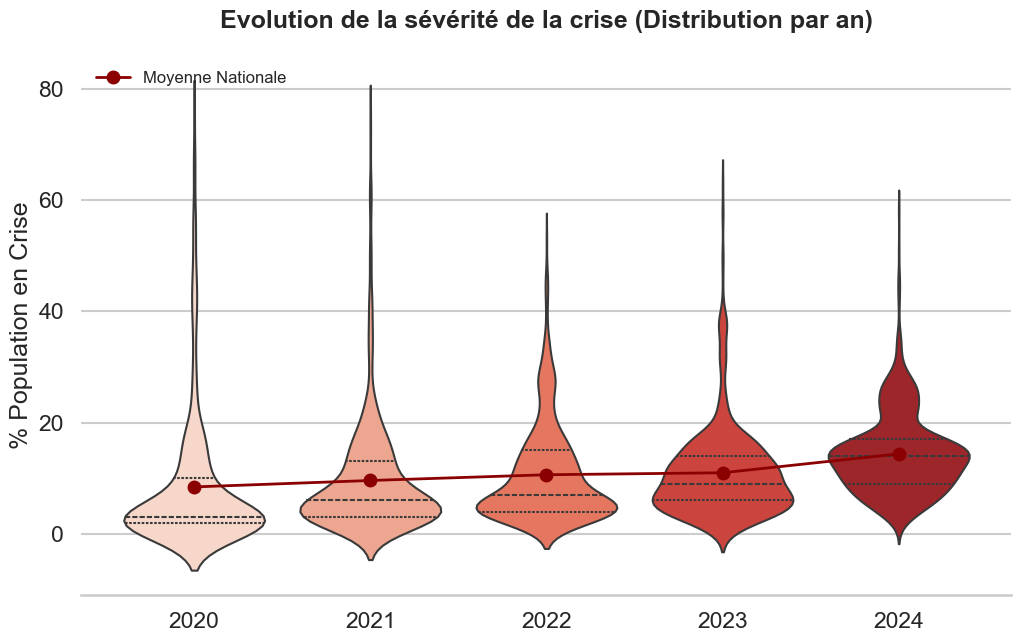

In [26]:


# ==============================================================================
# 4. EVOLUTION ANNUELLE (Violin Plot)
# ==============================================================================
# Ce graphique montre si la crise devient plus grave ou plus dispersée au fil des ans.
print("Generation du Violin Plot (Evolution Annuelle)...")

plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid", context="talk")

# Violin plot : Montre la densité de la distribution (la forme) + la médiane (point blanc)
ax = sns.violinplot(
    x="year", 
    y="target_pct", 
    data=df, 
    palette="Reds", 
    inner="quartile",  # Affiche les quartiles (25%, 50%, 75%)
    linewidth=1.5
)

sns.despine(left=True)
ax.set_title("Evolution de la sévérité de la crise (Distribution par an)", fontweight='bold', pad=20)
ax.set_ylabel("% Population en Crise")
ax.set_xlabel("")

# Ajout de la moyenne annuelle par un point rouge
means = df.groupby('year')['target_pct'].mean()
plt.plot(range(len(means)), means, 'o-', color='darkred', label='Moyenne Nationale', linewidth=2)
plt.legend(loc='upper left', frameon=False, fontsize=12)

plt.show()


In [27]:

# ==============================================================================
# 5. RELATION PLUIE vs FAIM (Scatter Plot Interactif)
# ==============================================================================
# Permet d'identifier les "anomalies" : régions avec beaucoup de pluie mais beaucoup de faim.
print("\nGeneration du Scatter Plot Interactif...")

# On filtre les données vides pour le graph
subset = df.dropna(subset=['target_pct', 'Rainfall_mm'])

fig = px.scatter(
    subset, 
    x="Rainfall_mm", 
    y="target_pct", 
    color="year",                 # Couleur par année pour voir l'évolution
    hover_name="admin2",          # Affiche le nom de la région au survol
    size="population",            # La taille du point dépend de la population totale
    size_max=40,
    opacity=0.6,
    color_continuous_scale="RdBu_r", # Rouge = Récent/Grave, Bleu = Ancien (ou inverse selon échelle)
    title="<b>Corrélation : Pluie vs Insécurité Alimentaire</b><br><span style='font-size:12px;color:grey'>Chaque bulle est une région à un instant T. Taille = Population.</span>"
)

fig.update_layout(
    template="plotly_white", 
    height=600,
    xaxis_title="Précipitations (mm/mois)",
    yaxis_title="Population en Crise (%)"
)
fig.show()



Generation du Scatter Plot Interactif...



Generation du Focus Regional (Top 4)...


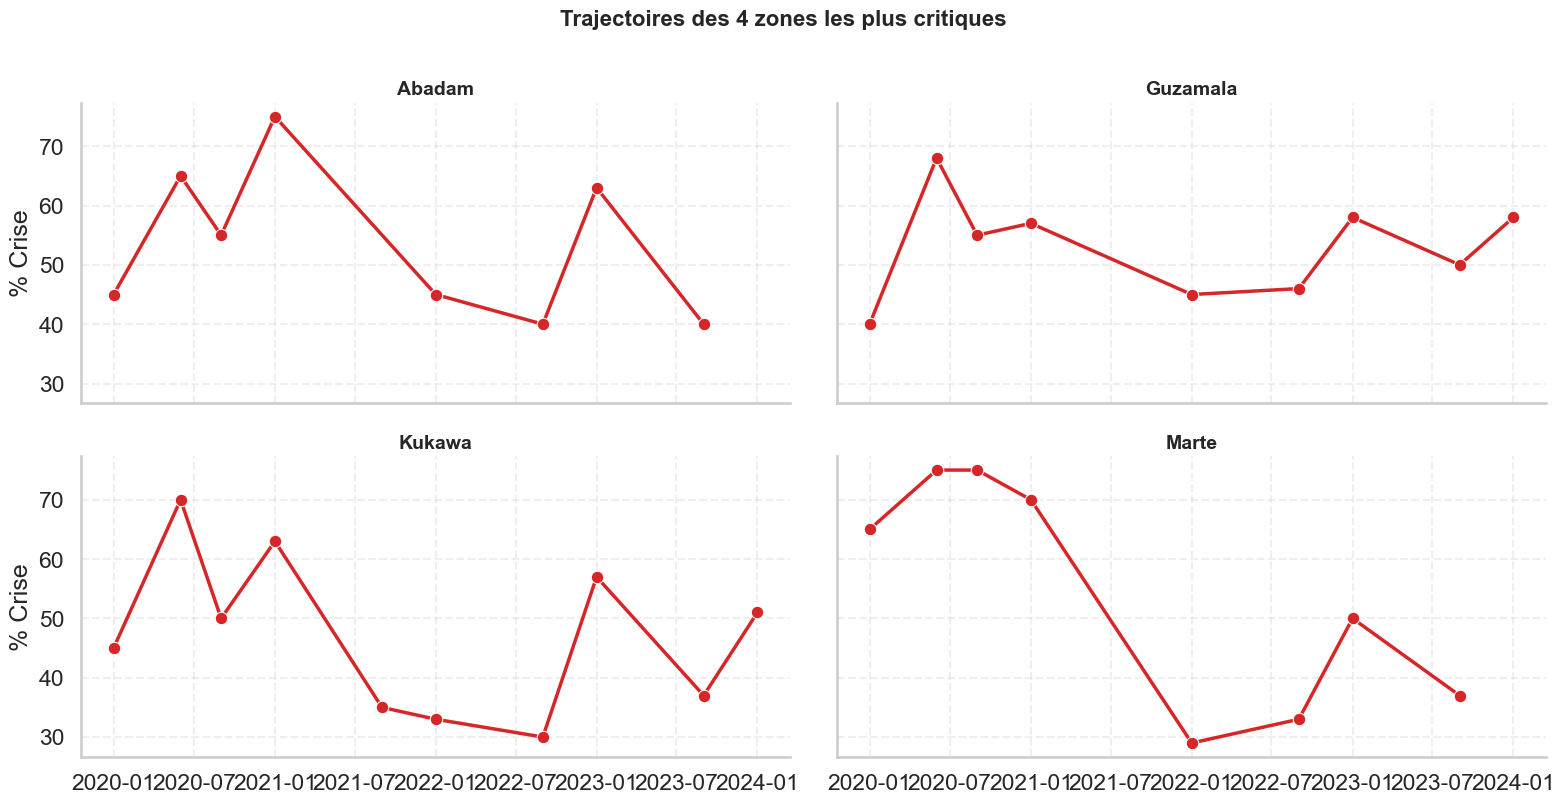

In [28]:

# ==============================================================================
# 6. FOCUS : LES 4 PIRES REGIONS (Small Multiples)
# ==============================================================================
# Comparaison directe des trajectoires des régions les plus touchées.
print("\nGeneration du Focus Regional (Top 4)...")

# Identification du Top 4
top4_names = df.groupby('admin2')['target_pct'].mean().sort_values(ascending=False).head(4).index
subset_top4 = df[df['admin2'].isin(top4_names)].sort_values(['admin2', 'date'])

# Graphique à facettes (Une courbe par région)
g = sns.FacetGrid(
    subset_top4, 
    col="admin2", 
    col_wrap=2,     # 2 graphiques par ligne
    height=4, 
    aspect=2, 
    sharey=True     # Même échelle Y pour comparer
)

# On trace la ligne rouge pour la faim
g.map(sns.lineplot, "date", "target_pct", color="#d62728", linewidth=2.5, marker="o")

# On ajoute une zone bleue pour la pluie en arrière-plan (sur un axe secondaire fictif pour le contexte)
# (C'est plus complexe avec FacetGrid, donc on reste simple ici pour la lisibilité)

# Titres et labels
g.set_titles("{col_name}", fontweight='bold', size=14)
g.set_axis_labels("", "% Crise")
g.fig.suptitle("Trajectoires des 4 zones les plus critiques", fontweight='bold', fontsize=16, y=1.05)

# Rotation des dates pour lisibilité
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=0)
    ax.grid(True, linestyle='--', alpha=0.3)

plt.show()